In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
print('Numpy Version:', np.__version__)
print('Pandas Version:', pd.__version__)
print('Seaborn Version:', sns.__version__)

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Virtual Internship - IDX Partners - Scoring Credit/loan_data_2007_2014.csv')

In [ ]:
#df = pd.read_csv('loan_data_2007_2014.csv')

In [ ]:
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [ ]:
df1=pd.read_excel('LCDataDictionary.xlsx')

In [ ]:
df1

,,Description,Unnamed: 2
0,_rec,The total amount committed by investors for th...,Jumlah total yang dilakukan oleh investor untu...
1,acc_now_delinq,The number of accounts on which the borrower i...,Jumlah akun di mana peminjam sekarang nakal.
2,addr_state,The state provided by the borrower in the loan...,Negara yang disediakan oleh peminjam dalam apl...
3,all_util,Balance to credit limit on all trades,Saldo ke batas kredit untuk semua perdagangan
4,annual_inc,The self-reported annual income provided by th...,Penghasilan tahunan yang dilaporkan sendiri ya...
...,...,...,...
75,url,URL for the LC page with listing data.,URL untuk halaman LC dengan data daftar.
76,verified_status_joint,Indicates if the co-borrowers' joint income wa...,Menunjukkan jika pendapatan bersama co-peminja...
77,zip_code,The first 3 numbers of the zip code provided b...,3 nomor pertama dari kode pos yang disediakan ...
78,NaN,NaN,NaN


## EDA

In [ ]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


In [ ]:
cats=['term','grade','sub_grade','emp_title','emp_length','home_ownership','verification_status','issue_d','loan_status','pymnt_plan','url','desc','purpose','title','zip_code','addr_state','earliest_cr_line','initial_list_status','last_pymnt_d','next_pymnt_d','last_credit_pull_d','application_type']

In [ ]:
df.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


In [ ]:
nums=['Unnamed: 0','id','member_id','loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delling_2yrs','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
      'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m',
      'open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m']

In [ ]:
cats=['term','grade','sub_grade','emp_title','emp_length','home_ownership','verification_status','issue_d','loan_status','pymnt_plan','url','desc','purpose','title','zip_code','addr_state','earliest_cr_line','initial_list_status','last_pymnt_d','next_pymnt_d','last_credit_pull_d','application_type']
nums=['Unnamed: 0','id','member_id','loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
      'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m',
      'open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m']

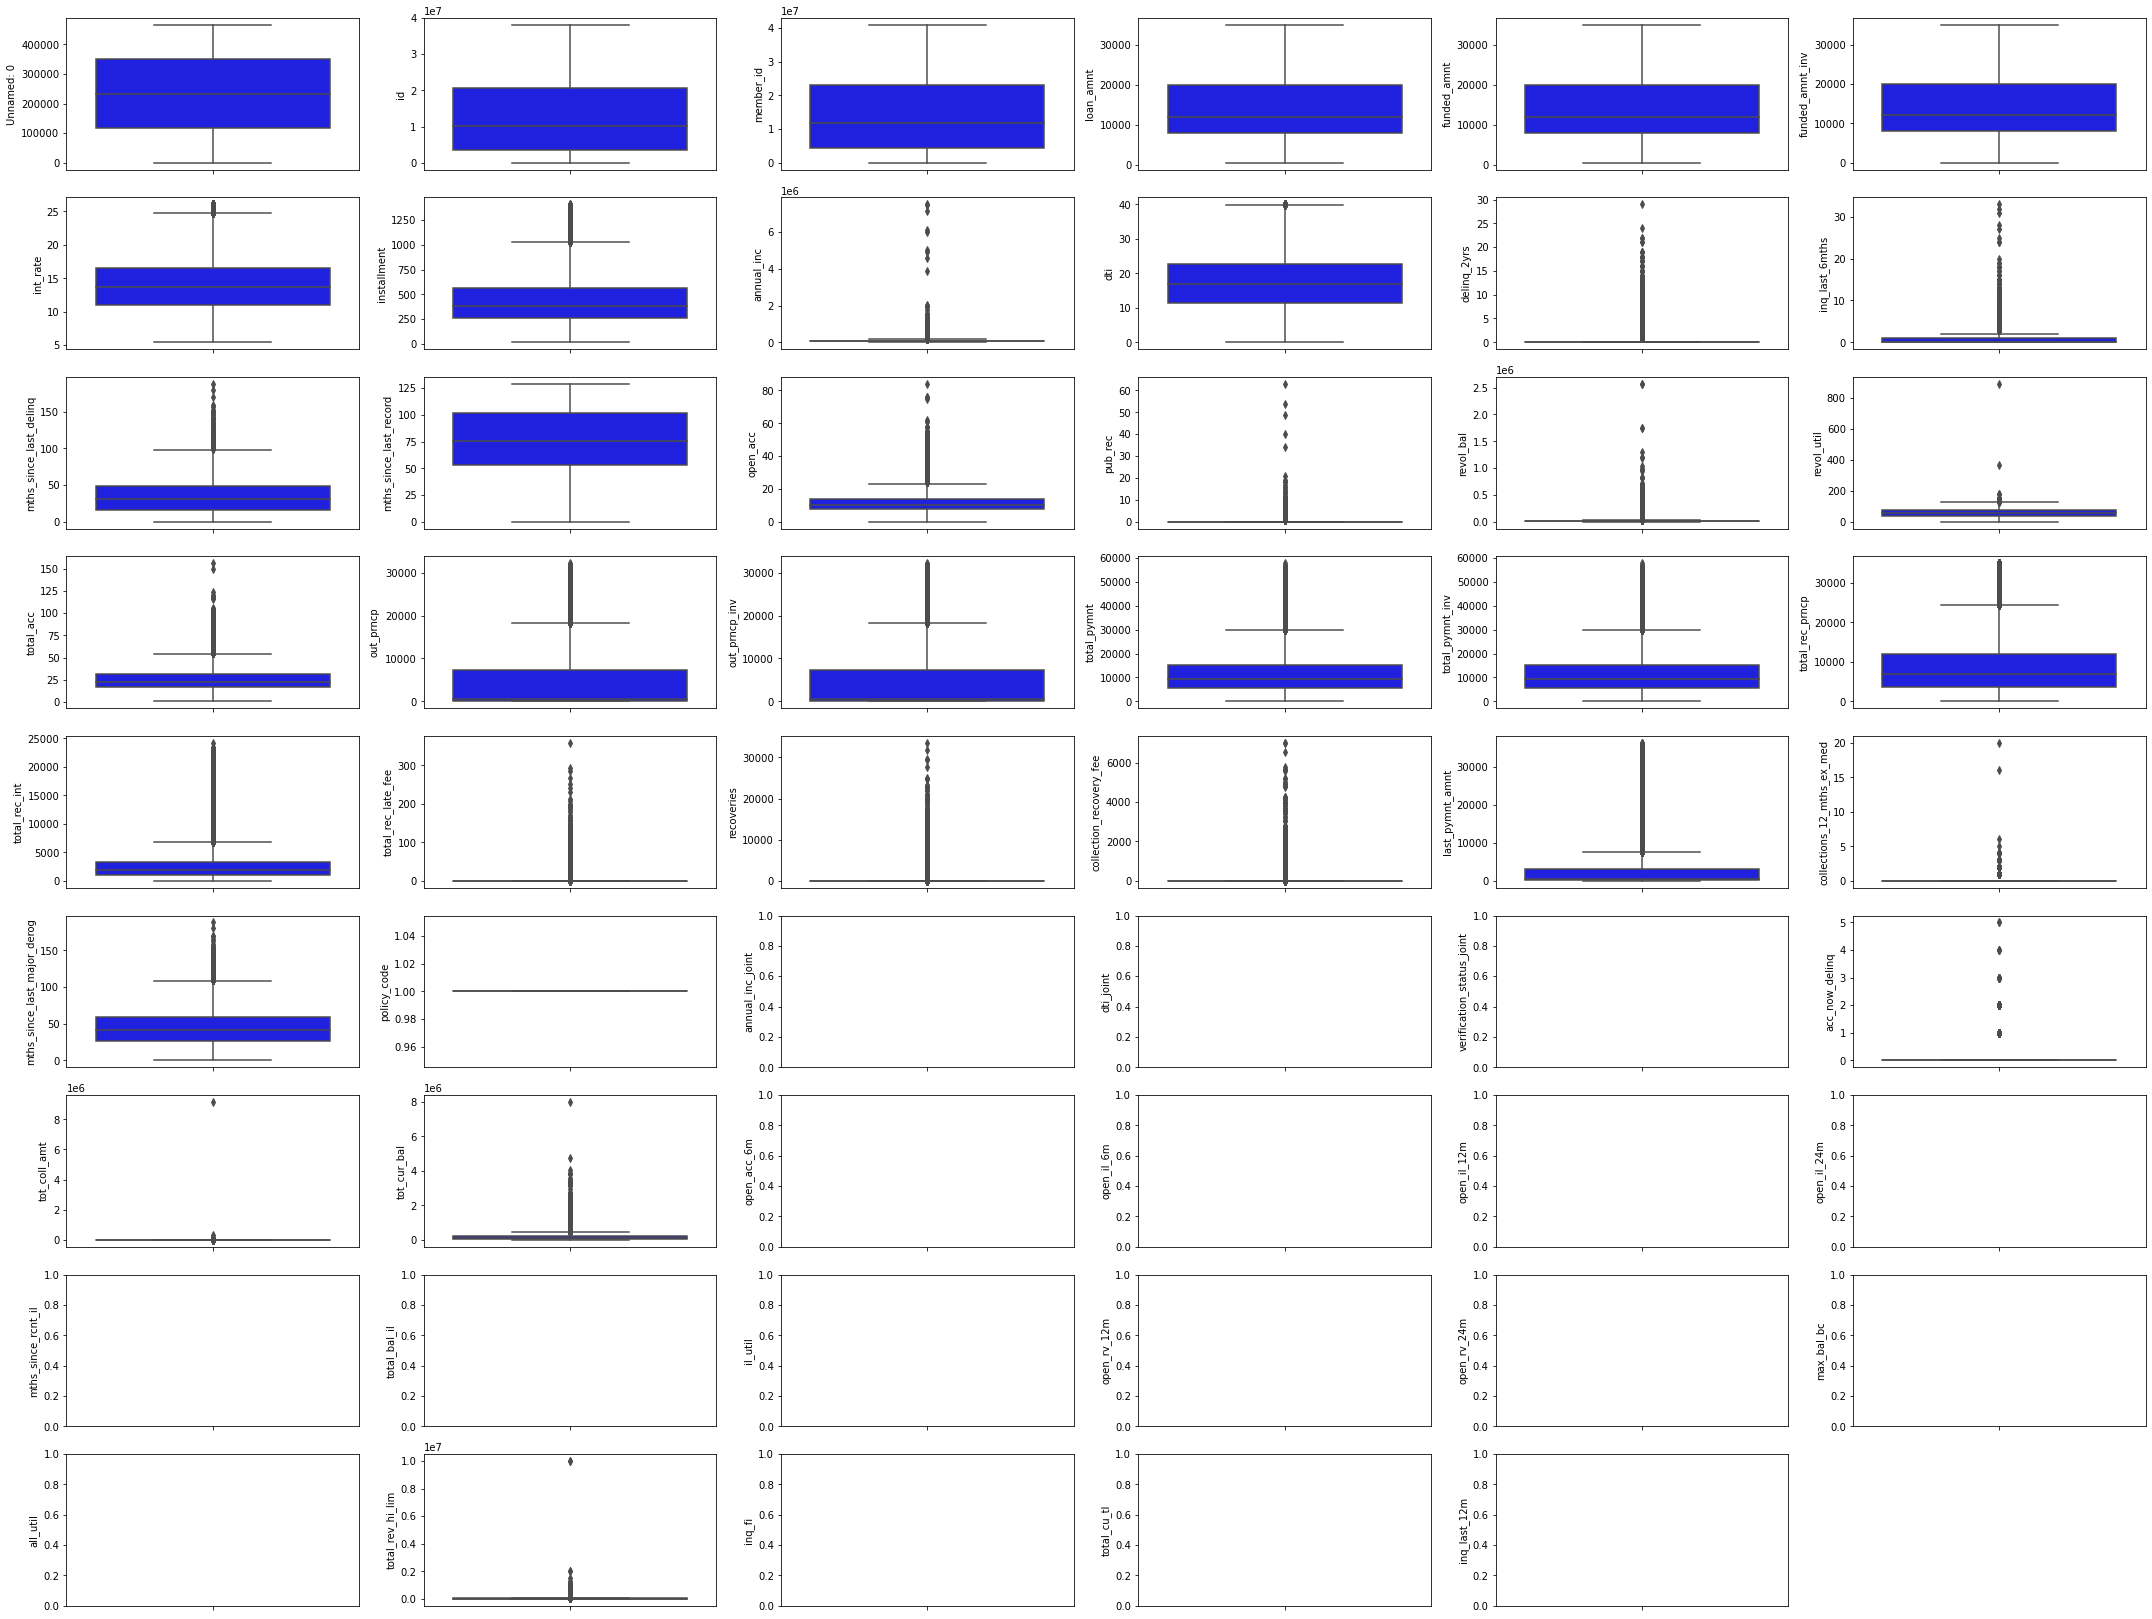

In [ ]:
features=nums
plt.figure(figsize=(30,25))
for i in range (0, len(features)):
    plt.subplot(10,6,i+1)
    sns.boxplot(y=df[features[i]], color='blue', orient='v')
    plt.tight_layout()

In [ ]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

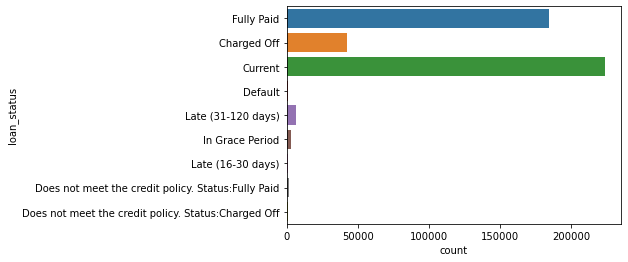

In [ ]:
sns.countplot(y=df['loan_status'])
plt.savefig('Loan_status.jpg')

approved= Fully Paid
reject= Charged Off , Does not meet the credit policy Sattus:Charged Off , Default, Does not meet the credit policy Status:Fully Paid
still being considered = Current, Late (31-120 days), In Grace Period, Late (16-30 days)

In [ ]:
good = ['Fully Paid']
bad = ['Charged Off' , 'Does not meet the credit policy. Status:Charged Off' , 'Default','Does not meet the credit policy. Status:Fully Paid']

In [ ]:
def loan(status):
    if status in bad:
        return 0
    return 1

In [ ]:
df2=df[df['loan_status'].isin(good+bad)].copy()

In [ ]:
df2['loan_status'].value_counts()

Fully Paid                                             184739
Charged Off                                             42475
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [ ]:
df2['loan_status']=df2['loan_status'].apply(loan)

In [ ]:
df2['loan_status'].value_counts()

1    184739
0     46056
Name: loan_status, dtype: int64

In [ ]:
df2

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,466276,9695736,11547808,8525,8525,8525.0,60 months,18.25,217.65,D,...,NaN,NaN,NaN,NaN,NaN,NaN,49800.0,NaN,NaN,NaN
466277,466277,9007579,10799568,18000,18000,17975.0,36 months,7.90,563.23,A,...,NaN,NaN,NaN,NaN,NaN,NaN,50300.0,NaN,NaN,NaN
466278,466278,9745590,11597671,10000,10000,10000.0,36 months,18.25,362.78,D,...,NaN,NaN,NaN,NaN,NaN,NaN,11100.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230795 entries, 0 to 466283
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   230795 non-null  int64  
 1   id                           230795 non-null  int64  
 2   member_id                    230795 non-null  int64  
 3   loan_amnt                    230795 non-null  int64  
 4   funded_amnt                  230795 non-null  int64  
 5   funded_amnt_inv              230795 non-null  float64
 6   term                         230795 non-null  object 
 7   int_rate                     230795 non-null  float64
 8   installment                  230795 non-null  float64
 9   grade                        230795 non-null  object 
 10  sub_grade                    230795 non-null  object 
 11  emp_title                    217878 non-null  object 
 12  emp_length                   222040 non-null  object 
 13 

cats=['term','grade','sub_grade','emp_title','emp_length','home_ownership','verification_status','issue_d','loan_status','pymnt_plan','url','desc','purpose','title','zip_code','addr_state','earliest_cr_line','initial_list_status','last_pymnt_d','next_pymnt_d','last_credit_pull_d','application_type']

nums=['Unnamed: 0','id','member_id','loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delling_2yrs','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
      'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m',
      'open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m']

In [ ]:
cats1 = ['term','grade','sub_grade','home_ownership','verification_status','pymnt_plan','purpose','title']

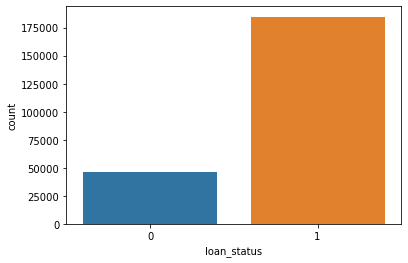

In [ ]:
sns.countplot(x=df2['loan_status'])
plt.savefig('Status.jpg')

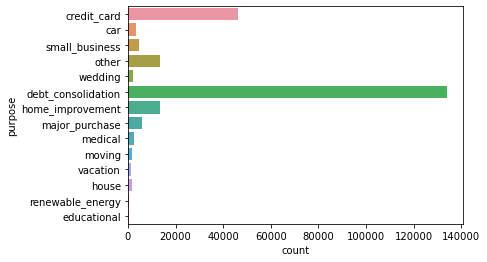

In [ ]:
sns.countplot(y=df2['purpose'])
plt.savefig('purpose.jpg')

In [ ]:
newpalette=['#FFABE1','#937DC2']

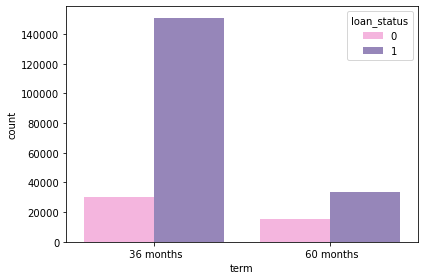

In [ ]:
sns.countplot(x='term', data=df2, hue='loan_status', palette=newpalette)
plt.tight_layout()
plt.savefig('term.jpg')

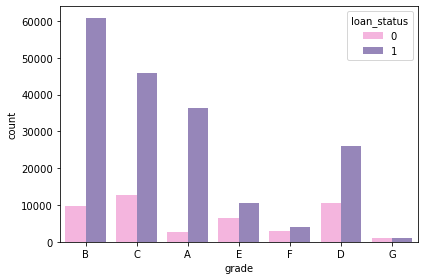

In [ ]:
sns.countplot(x='grade', data=df2, hue='loan_status', palette=newpalette)
plt.tight_layout()
plt.savefig('grade.jpg')

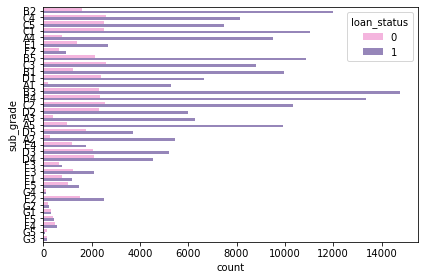

In [ ]:
sns.countplot(y='sub_grade', data=df2, hue='loan_status', palette=newpalette)
plt.tight_layout()

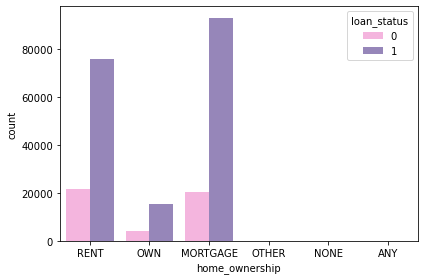

In [ ]:
sns.countplot(x='home_ownership', data=df2, hue='loan_status', palette=newpalette)
plt.tight_layout()
plt.savefig('own.jpg')

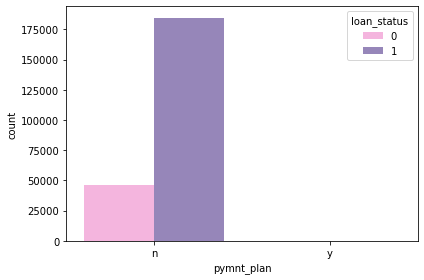

In [ ]:
sns.countplot(x='pymnt_plan', data=df2, hue='loan_status', palette=newpalette)
plt.tight_layout()

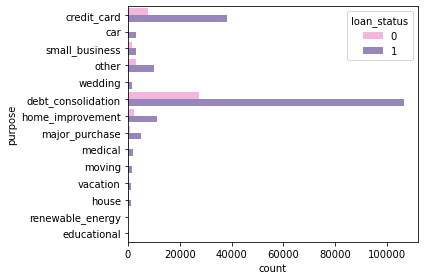

In [ ]:
sns.countplot(y='purpose', data=df2, hue='loan_status', palette=newpalette)
plt.tight_layout()
plt.savefig('purpose_loan.jpg')

In [ ]:
nums1 = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','total_acc','total_rec_prncp']

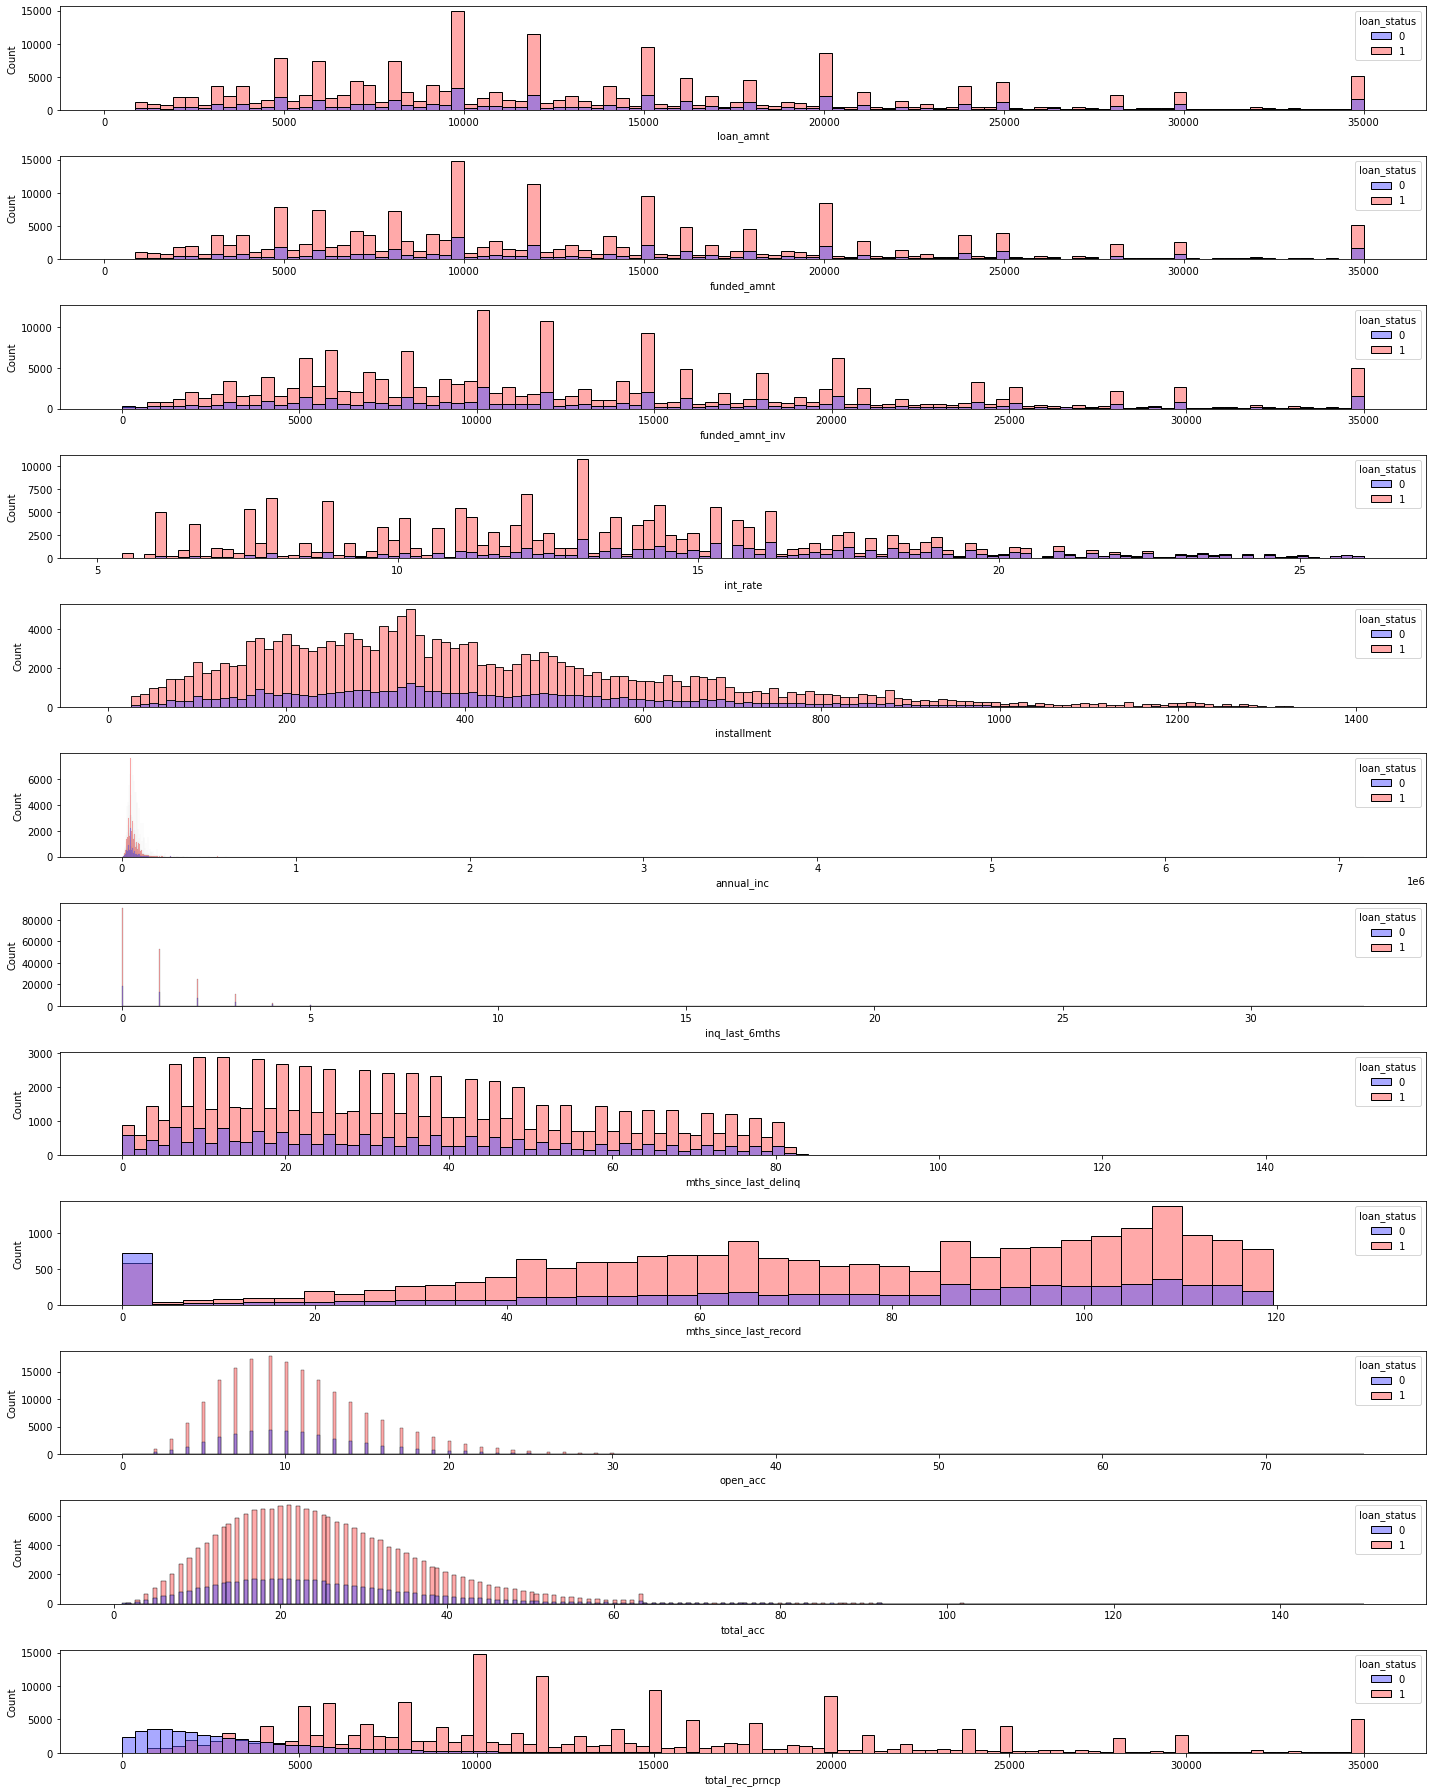

In [ ]:
features = nums1
plt.figure(figsize=(20, 25))
for i in range(0, len(features)):
    plt.subplot(12, 1, i+1) 
    sns.histplot(x=features[i], data=df2,  palette="seismic", hue="loan_status")
    #plt.xlabel(features[i])
    plt.tight_layout()

In [ ]:
color=['#319DA0','#FFD39A']

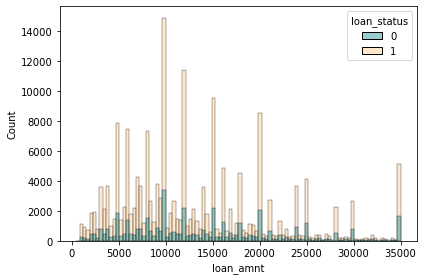

In [ ]:
sns.histplot(x='loan_amnt', data=df2, palette=color, hue='loan_status')
plt.tight_layout()
plt.savefig('loanamnt.jpg')

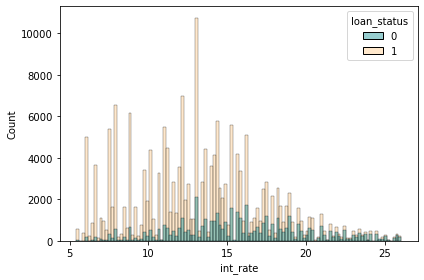

In [ ]:
sns.histplot(x='int_rate', data=df2, palette=color, hue='loan_status')
plt.tight_layout()
plt.savefig('intrate.jpg')

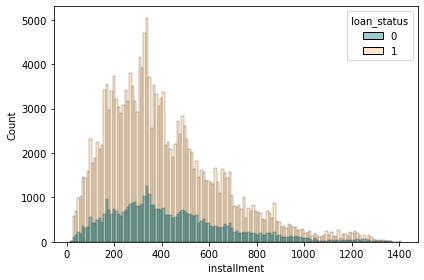

In [ ]:
sns.histplot(x='installment', data=df2, palette=color, hue='loan_status')
plt.tight_layout()
plt.savefig('install.jpg')

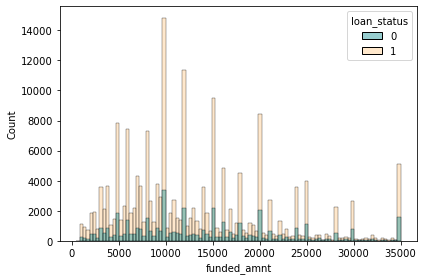

In [ ]:
sns.histplot(x='funded_amnt', data=df2, palette=color, hue='loan_status')
plt.tight_layout()
plt.savefig('funded.jpg')

## Data Preprocessing

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230795 entries, 0 to 466283
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   230795 non-null  int64  
 1   id                           230795 non-null  int64  
 2   member_id                    230795 non-null  int64  
 3   loan_amnt                    230795 non-null  int64  
 4   funded_amnt                  230795 non-null  int64  
 5   funded_amnt_inv              230795 non-null  float64
 6   term                         230795 non-null  object 
 7   int_rate                     230795 non-null  float64
 8   installment                  230795 non-null  float64
 9   grade                        230795 non-null  object 
 10  sub_grade                    230795 non-null  object 
 11  emp_title                    217878 non-null  object 
 12  emp_length                   222040 non-null  object 
 13 

In [ ]:
df3=df2.drop(columns=(['Unnamed: 0','id','member_id']))

In [ ]:
df3

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,8525,8525,8525.0,60 months,18.25,217.65,D,D3,MANAGER,5 years,...,NaN,NaN,NaN,NaN,NaN,NaN,49800.0,NaN,NaN,NaN
466277,18000,18000,17975.0,36 months,7.90,563.23,A,A4,sales rep,3 years,...,NaN,NaN,NaN,NaN,NaN,NaN,50300.0,NaN,NaN,NaN
466278,10000,10000,10000.0,36 months,18.25,362.78,D,D3,MecÃ¡nica,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,11100.0,NaN,NaN,NaN
466281,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN


In [ ]:
cats=['term','grade','sub_grade','emp_title','emp_length','home_ownership','verification_status','issue_d','loan_status','pymnt_plan','url','desc','purpose','title','zip_code','addr_state','earliest_cr_line','initial_list_status','last_pymnt_d','next_pymnt_d','last_credit_pull_d','application_type']
nums=['Unnamed: 0','id','member_id','loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
      'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m',
      'open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m']

In [ ]:
cats=['term','grade','sub_grade','emp_title','emp_length','home_ownership','verification_status','issue_d','loan_status','pymnt_plan','url','desc','purpose','title','zip_code','addr_state','earliest_cr_line','initial_list_status','last_pymnt_d','next_pymnt_d','last_credit_pull_d','application_type']
for col in cats:
  print(f'''Value count kolom {col}:''')
  print(df3[col].value_counts())
  print()

Value count kolom term:
 36 months    181484
 60 months     49311
Name: term, dtype: int64

Value count kolom grade:
B    70622
C    58626
A    39110
D    36740
E    16945
F     6896
G     1856
Name: grade, dtype: int64

Value count kolom sub_grade:
B3    17046
B4    15704
B2    13627
C1    13555
B5    13034
C2    12906
C3    11435
B1    11211
A5    10932
C4    10718
A4    10287
C5    10012
D1     9048
D2     8294
D3     7254
A3     6699
D4     6680
A2     5720
A1     5472
D5     5464
E1     4086
E2     4062
E3     3340
E4     2954
E5     2503
F1     1965
F2     1571
F3     1420
F4     1084
F5      856
G1      627
G2      454
G3      304
G4      244
G5      227
Name: sub_grade, dtype: int64

Value count kolom emp_title:
Teacher                          1541
Manager                          1514
Registered Nurse                  673
RN                                670
Supervisor                        667
                                 ... 
OKLAHOMA CITY COMMUNITY             1
Nati

In [ ]:
nums=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
      'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m',
      'open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m']
for col in nums:
  print(f'''Value count kolom {col}:''')
  print(df3[col].value_counts())
  print()

Value count kolom loan_amnt:
10000    16700
12000    12887
15000    10970
20000    10060
8000      8036
         ...  
32175        1
28225        1
32675        1
25125        1
29350        1
Name: loan_amnt, Length: 1308, dtype: int64

Value count kolom funded_amnt:
10000    16609
12000    12798
15000    10860
20000     9880
8000      8024
         ...  
31075        1
31125        1
30475        1
30150        1
29350        1
Name: funded_amnt, Length: 1311, dtype: int64

Value count kolom funded_amnt_inv:
10000.000000    13557
12000.000000    10231
15000.000000     8382
20000.000000     7129
8000.000000      6790
                ...  
9221.938953         1
22710.287520        1
14461.722070        1
9556.694912         1
13964.965170        1
Name: funded_amnt_inv, Length: 9552, dtype: int64

Value count kolom int_rate:
12.12    7510
8.90     6648
13.11    6530
7.90     6373
10.99    5512
         ... 
18.72       1
22.94       1
24.40       1
14.28       1
16.83       1
Name: in

In [ ]:
df3['terms']=df3['term'].str.replace(' months',' ')
df3['terms']=df3['terms'].astype('float')

In [ ]:
df3['terms'].unique()

array([36., 60.])

In [ ]:
df3['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years',
       nan], dtype=object)

In [ ]:
df3['emp_length'] = df3['emp_length'].str.replace('\+ years', '')
df3['emp_length'] = df3['emp_length'].str.replace('< 1 year', str(0))
df3['emp_length'] = df3['emp_length'].str.replace(' years', '')
df3['emp_length'] = df3['emp_length'].str.replace(' year', '')

In [ ]:
df3['emp_length']=df3['emp_length'].astype('float')

In [ ]:
df3['emp_length'].unique()

array([10.,  0.,  3.,  9.,  4.,  5.,  1.,  6.,  2.,  7.,  8., nan])

In [ ]:
df3['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [ ]:
df3['issue_d_date']= pd.to_datetime(df3['issue_d'],format='%b-%y')

In [ ]:
df3['issue_d_date'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d_date, dtype: datetime64[ns]

In [ ]:
df3['month_issue_d']=round((pd.to_datetime('2019-12-01')-df3['issue_d_date'])/np.timedelta64(1,'M'),2)

In [ ]:
df3['month_issue_d']

0         96.00
1         96.00
2         96.00
3         96.00
5         96.00
          ...  
466276    70.97
466277    70.97
466278    70.97
466281    70.97
466283    70.97
Name: month_issue_d, Length: 230795, dtype: float64

In [ ]:
df3['earliest_cr_line_date']= pd.to_datetime(df3['earliest_cr_line'], format='%b-%y')

In [ ]:
df3['earliest_cr_line_months']=round((pd.to_datetime('2019-12-01')-df3['earliest_cr_line_date'])/np.timedelta64(1,'M'),2)

In [ ]:
df3['earliest_cr_line_months']

0         418.97
1         248.02
2         216.97
3         285.97
5         180.96
           ...  
466276    300.98
466277    257.02
466278    210.01
466281    270.00
466283    201.96
Name: earliest_cr_line_months, Length: 230795, dtype: float64

In [ ]:
df3['earliest_cr_line_months'].describe()

count    230766.000000
mean        260.887568
std          89.734727
min        -588.040000
25%         206.990000
50%         247.040000
75%         302.990000
max         610.970000
Name: earliest_cr_line_months, dtype: float64

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230795 entries, 0 to 466283
Data columns (total 77 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    230795 non-null  int64         
 1   funded_amnt                  230795 non-null  int64         
 2   funded_amnt_inv              230795 non-null  float64       
 3   term                         230795 non-null  object        
 4   int_rate                     230795 non-null  float64       
 5   installment                  230795 non-null  float64       
 6   grade                        230795 non-null  object        
 7   sub_grade                    230795 non-null  object        
 8   emp_title                    217878 non-null  object        
 9   emp_length                   222040 non-null  float64       
 10  home_ownership               230795 non-null  object        
 11  annual_inc                

In [ ]:
df3['last_credit_pull_d_date']= pd.to_datetime(df3['last_credit_pull_d'], format='%b-%y')

In [ ]:
df3['last_credit_pull_d_months']=round((pd.to_datetime('2019-12-01')-df3['last_credit_pull_d_date'])/np.timedelta64(1,'M'),2)

In [ ]:
df3['last_credit_pull_d_months'].head()

0    46.98
1    74.97
2    46.98
3    58.97
5    50.99
Name: last_credit_pull_d_months, dtype: float64

In [ ]:
df3['next_pymnt_d'].value_counts()

Feb-16    795
Mar-11    107
Apr-11    101
Feb-11     91
Jan-11     79
         ... 
Feb-08      2
Oct-14      2
Mar-15      1
May-08      1
Dec-07      1
Name: next_pymnt_d, Length: 99, dtype: int64

In [ ]:
df3['next_pymnt_d_date']= pd.to_datetime(df3['next_pymnt_d'], format='%b-%y')

In [ ]:
df3['next_pymnt_d_months']=round((pd.to_datetime('2019-12-01')-df3['next_pymnt_d_date'])/np.timedelta64(1,'M'),2)

In [ ]:
df3['next_pymnt_d_months'].value_counts()

45.96     795
105.04    107
104.02    101
105.96     91
106.98     79
         ... 
141.97      2
62.00       2
57.04       1
139.01      1
144.00      1
Name: next_pymnt_d_months, Length: 99, dtype: int64

In [ ]:
df3['last_pymnt_d_date']= pd.to_datetime(df3['last_pymnt_d'], format='%b-%y')

In [ ]:
df3['last_pymnt_d_months']=round((pd.to_datetime('2019-12-01')-df3['last_pymnt_d_date'])/np.timedelta64(1,'M'),2)

In [ ]:
df3['last_pymnt_d_months'].head()

0    58.97
1    80.00
2    66.01
3    58.97
5    58.97
Name: last_pymnt_d_months, dtype: float64

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230795 entries, 0 to 466283
Data columns (total 83 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    230795 non-null  int64         
 1   funded_amnt                  230795 non-null  int64         
 2   funded_amnt_inv              230795 non-null  float64       
 3   term                         230795 non-null  object        
 4   int_rate                     230795 non-null  float64       
 5   installment                  230795 non-null  float64       
 6   grade                        230795 non-null  object        
 7   sub_grade                    230795 non-null  object        
 8   emp_title                    217878 non-null  object        
 9   emp_length                   222040 non-null  float64       
 10  home_ownership               230795 non-null  object        
 11  annual_inc                

In [ ]:
df4=df3.drop(columns=(['term','issue_d_date','earliest_cr_line_date','next_pymnt_d_date','last_credit_pull_d_date','last_pymnt_d_date',
                      'issue_d','url','desc','title','zip_code','addr_state','last_pymnt_d','next_pymnt_d','last_credit_pull_d',
                      'annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m','open_il_24m',
                      'mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi',
                      'total_cu_tl','inq_last_12m','policy_code','sub_grade']))

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230795 entries, 0 to 466283
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    230795 non-null  int64  
 1   funded_amnt                  230795 non-null  int64  
 2   funded_amnt_inv              230795 non-null  float64
 3   int_rate                     230795 non-null  float64
 4   installment                  230795 non-null  float64
 5   grade                        230795 non-null  object 
 6   emp_title                    217878 non-null  object 
 7   emp_length                   222040 non-null  float64
 8   home_ownership               230795 non-null  object 
 9   annual_inc                   230791 non-null  float64
 10  verification_status          230795 non-null  object 
 11  loan_status                  230795 non-null  int64  
 12  pymnt_plan                   230795 non-null  object 
 13 

In [ ]:
df4.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,...,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,terms,month_issue_d,earliest_cr_line_months,last_credit_pull_d_months,next_pymnt_d_months,last_pymnt_d_months
loan_amnt,1.000000,0.997201,0.988410,0.209922,0.955865,0.124708,0.349604,-0.049253,0.058736,0.010915,...,0.012910,-0.002143,0.317075,0.349756,0.392634,-0.158373,0.143203,-0.067749,-0.329325,-0.121419
funded_amnt,0.997201,1.000000,0.991833,0.211841,0.960092,0.125589,0.348446,-0.048790,0.060812,0.011765,...,0.013234,-0.002143,0.317071,0.349757,0.388091,-0.169023,0.141127,-0.073029,-0.341009,-0.129123
funded_amnt_inv,0.988410,0.991833,1.000000,0.214592,0.951350,0.131072,0.343603,-0.039854,0.067427,0.012580,...,0.013695,-0.002141,0.317045,0.349715,0.389659,-0.213553,0.136055,-0.103517,-0.568948,-0.174915
int_rate,0.209922,0.211841,0.214592,1.000000,0.201046,0.035160,-0.018747,-0.241059,0.170503,0.102812,...,0.032449,0.000837,-0.109226,-0.176188,0.442501,-0.180008,-0.085755,-0.072144,-0.289994,-0.074685
installment,0.955865,0.960092,0.951350,0.201046,1.000000,0.112516,0.346351,-0.033419,0.061073,0.023201,...,0.015888,-0.001703,0.285851,0.324128,0.160954,-0.161678,0.127705,-0.079212,-0.254214,-0.127110
emp_length,0.124708,0.125589,0.131072,0.035160,0.112516,1.000000,0.080569,0.009499,0.056343,0.032052,...,0.010251,-0.002939,0.102257,0.084722,0.076508,-0.127661,0.214520,-0.087141,-0.238361,-0.108105
annual_inc,0.349604,0.348446,0.343603,-0.018747,0.346351,0.080569,1.000000,0.061623,-0.175644,0.055491,...,0.017705,0.002448,0.473072,0.327861,0.067037,-0.040654,0.153101,-0.016227,0.002038,-0.023565
loan_status,-0.049253,-0.048790,-0.039854,-0.241059,-0.033419,0.009499,0.061623,1.000000,-0.107257,-0.019631,...,-0.006406,0.001637,0.076230,0.052931,-0.154273,-0.011139,0.032966,-0.074693,NaN,-0.159052
dti,0.058736,0.060812,0.067427,0.170503,0.061073,0.056343,-0.175644,-0.107257,1.000000,-0.000131,...,0.009668,-0.003977,-0.017437,0.061899,0.069319,-0.181079,0.018573,-0.141075,-0.260151,-0.157028
delinq_2yrs,0.010915,0.011765,0.012580,0.102812,0.023201,0.032052,0.055491,-0.019631,-0.000131,1.000000,...,0.110191,-0.000597,0.067340,-0.037708,0.005742,-0.081062,0.074086,-0.038805,-0.059340,-0.052098


<AxesSubplot:>

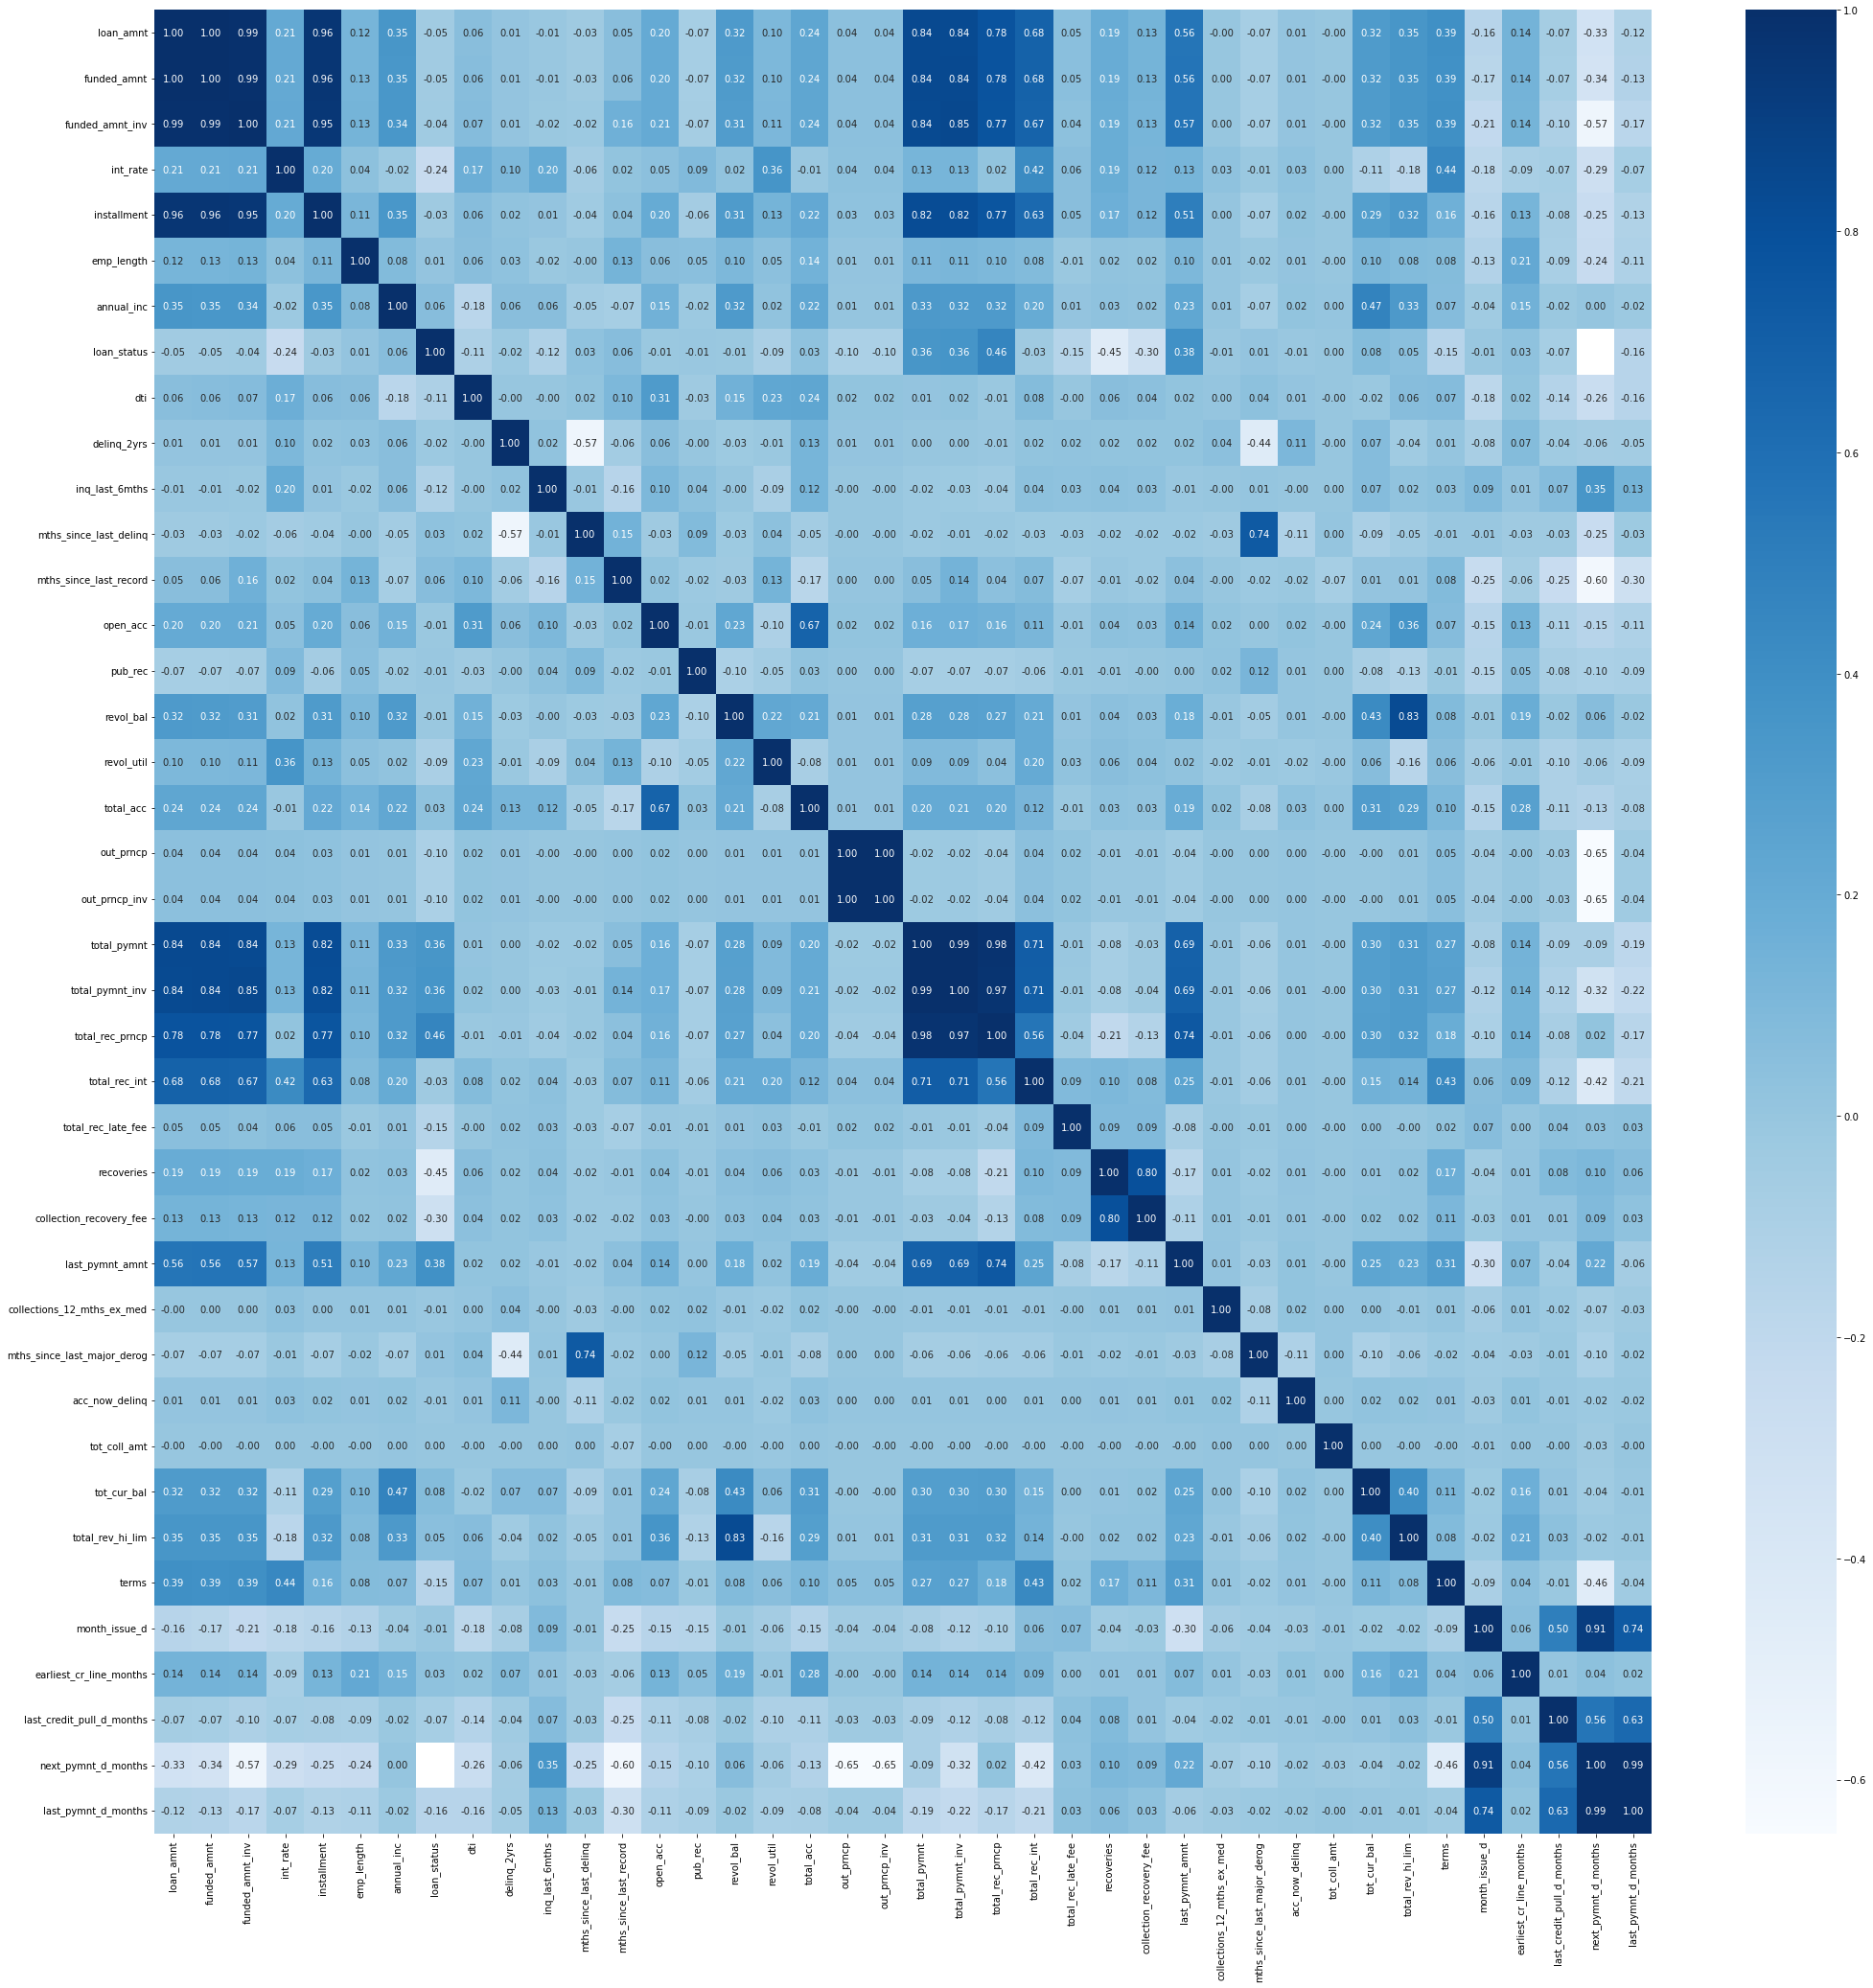

In [ ]:
plt.figure(figsize=(35, 35))
sns.heatmap(df4.corr(), cmap='Blues', annot=True, fmt='.2f')

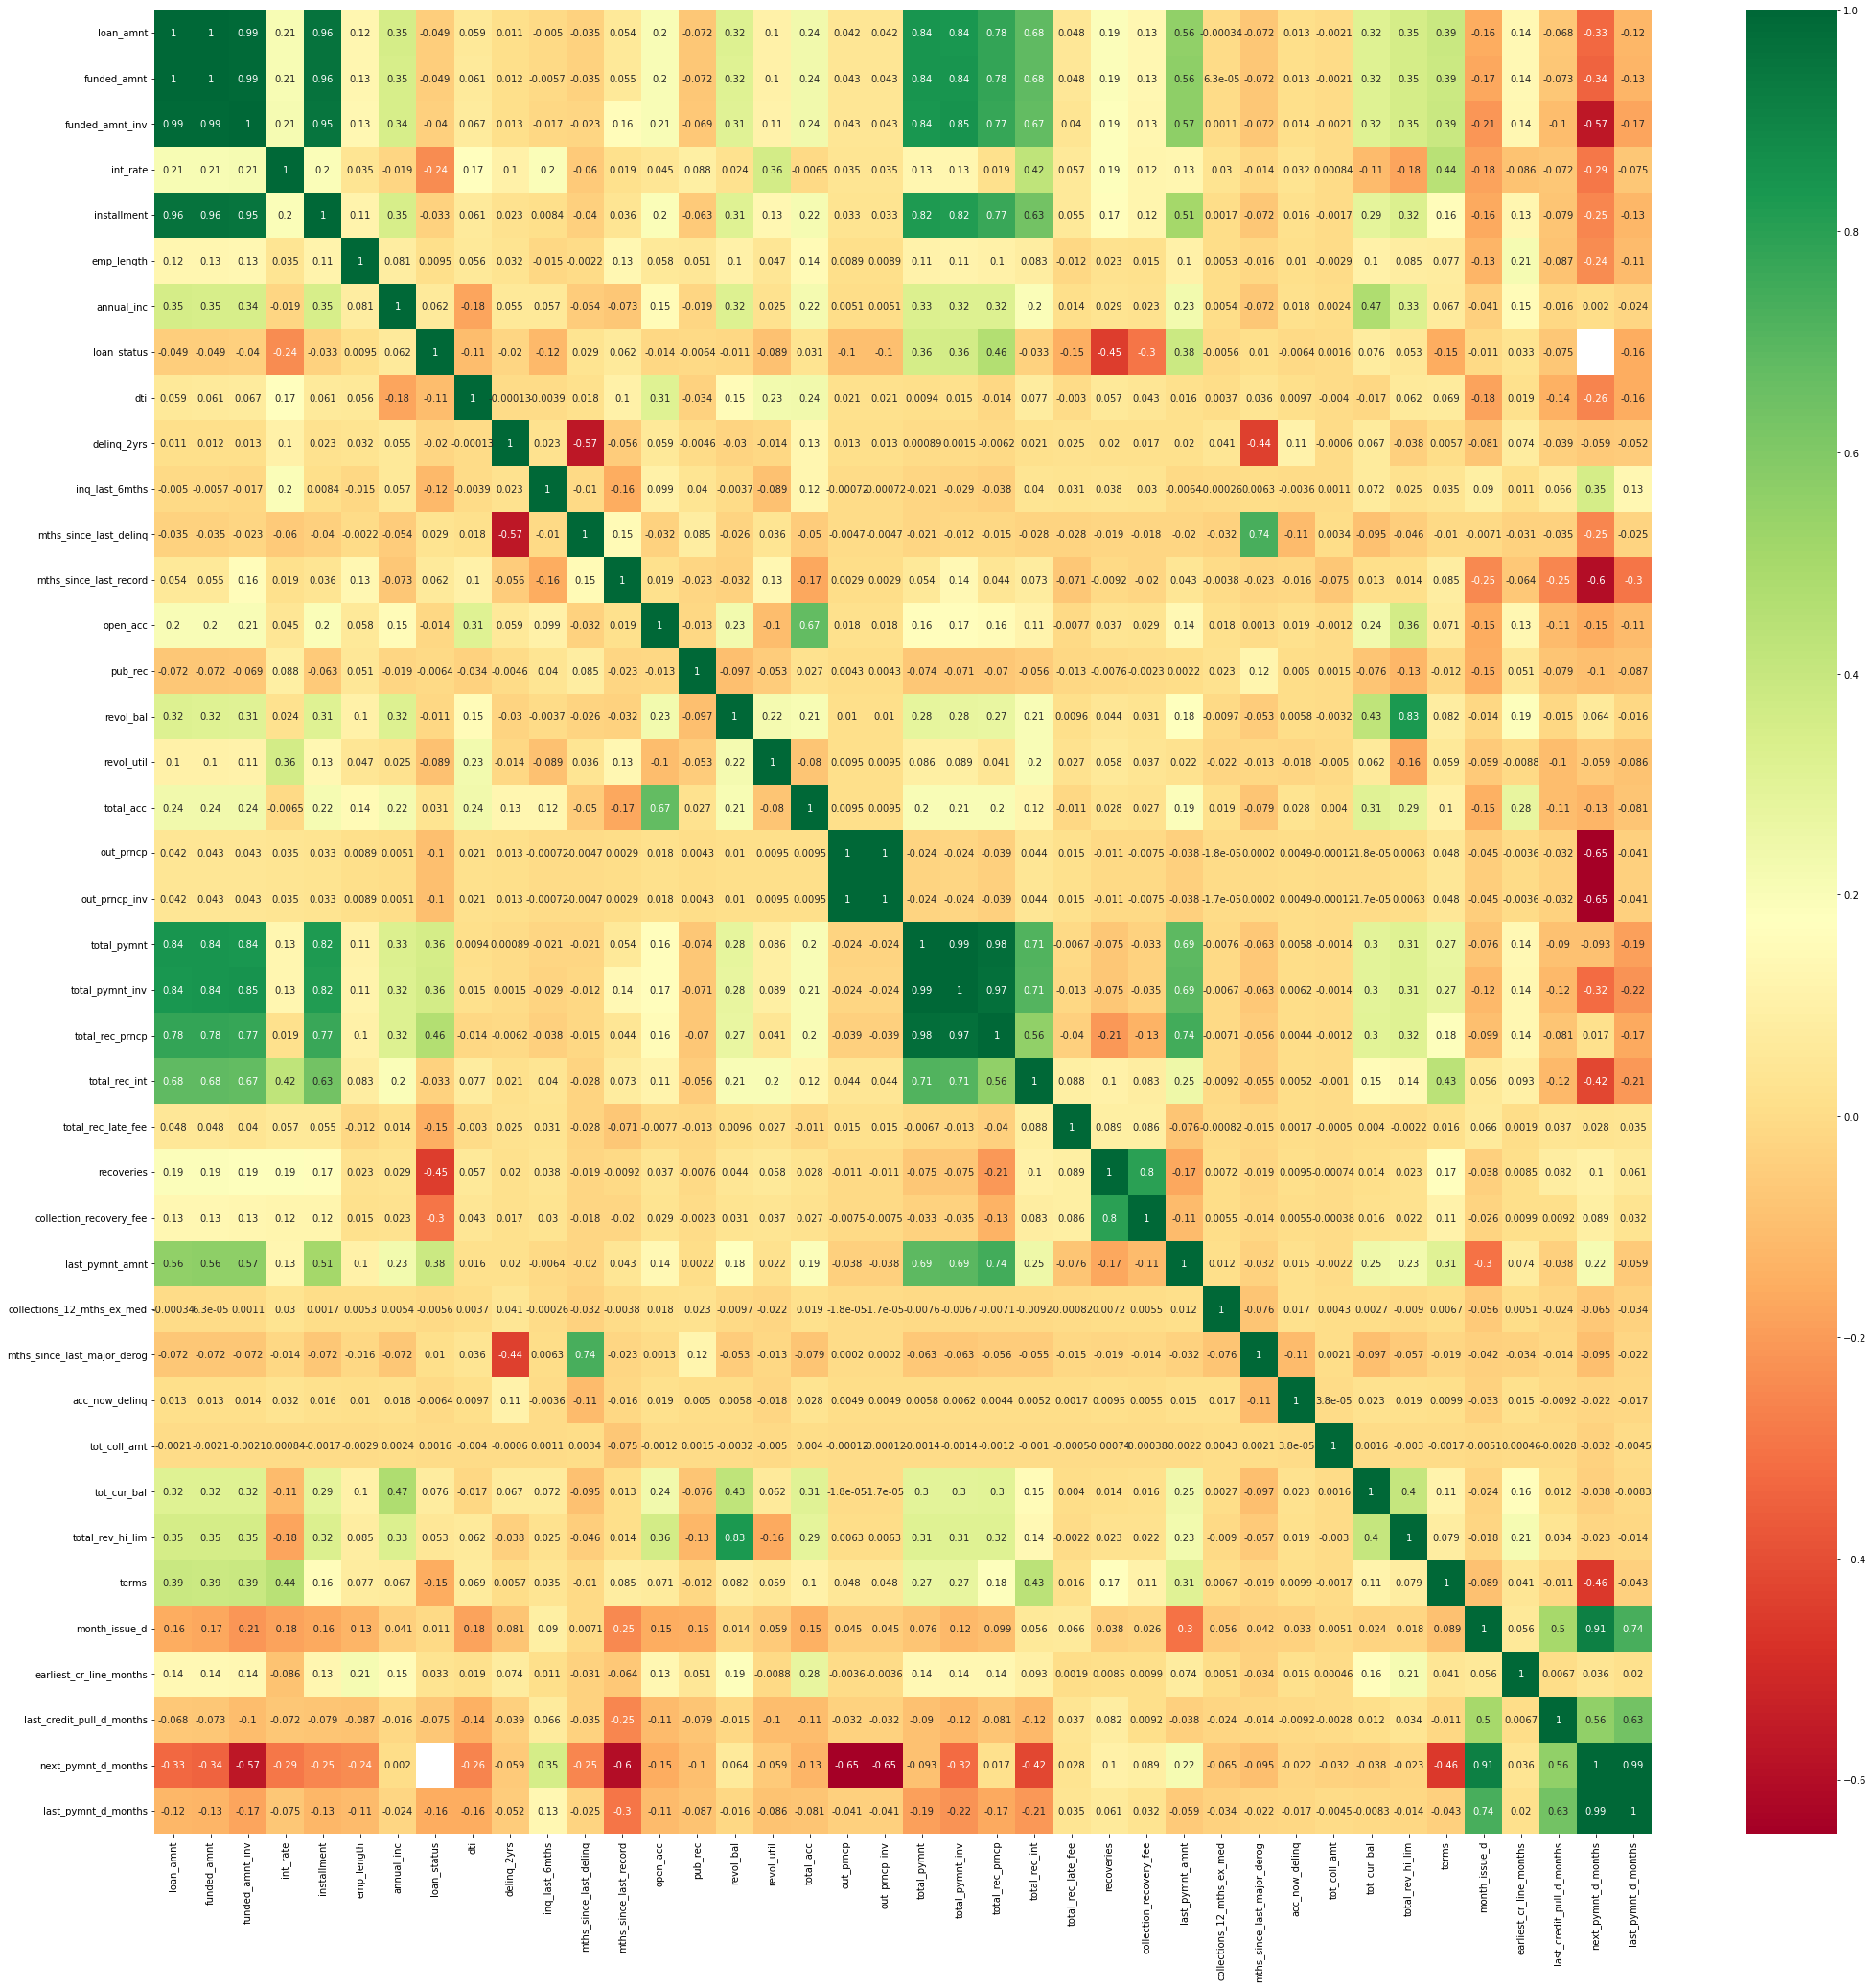

In [ ]:
corrmat = df4.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(35,35))
g=sns.heatmap(df4[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
a = corrmat['loan_status']
hasil = a[(a>0.7)|(a<-0.7)]
hasil

loan_status    1.0
Name: loan_status, dtype: float64

In [ ]:
df4.select_dtypes(include='object').nunique()

grade                       7
emp_title              126879
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
earliest_cr_line          634
initial_list_status         2
application_type            1
dtype: int64

In [ ]:
df4.select_dtypes(exclude='object').nunique()

loan_amnt                        1308
funded_amnt                      1311
funded_amnt_inv                  9552
int_rate                          505
installment                     43071
emp_length                         11
annual_inc                      18195
loan_status                         2
dti                              3880
delinq_2yrs                        22
inq_last_6mths                     28
mths_since_last_delinq            125
mths_since_last_record            123
open_acc                           57
pub_rec                            12
revol_bal                       45985
revol_util                       1194
total_acc                         101
out_prncp                         821
out_prncp_inv                     824
total_pymnt                    220666
total_pymnt_inv                215252
total_rec_prncp                 44070
total_rec_int                  172951
total_rec_late_fee               4639
recoveries                      22773
collection_r

In [ ]:
df5=df4.drop(columns=['mths_since_last_record','mths_since_last_major_derog','next_pymnt_d_months','emp_title','earliest_cr_line','application_type'])

In [ ]:
df5.isna().sum()

loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
int_rate                           0
installment                        0
grade                              0
emp_length                      8755
home_ownership                     0
annual_inc                         4
verification_status                0
loan_status                        0
pymnt_plan                         0
purpose                            0
dti                                0
delinq_2yrs                       29
inq_last_6mths                    29
mths_since_last_delinq        129684
open_acc                          29
pub_rec                           29
revol_bal                          0
revol_util                       226
total_acc                         29
initial_list_status                0
out_prncp                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
t

In [ ]:
df5.select_dtypes(include='object').describe().T

,count,unique,top,freq
grade,230795,7,B,70622
home_ownership,230795,6,MORTGAGE,113627
verification_status,230795,3,Verified,85740
pymnt_plan,230795,2,n,230793
purpose,230795,14,debt_consolidation,133920
initial_list_status,230795,2,f,173143


In [ ]:
df5.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,230795.0,13412.187114,8042.975786,500.00,7200.000000,12000.00,18000.000000,3.500000e+04
funded_amnt,230795.0,13365.295500,8017.161601,500.00,7200.000000,12000.00,18000.000000,3.500000e+04
funded_amnt_inv,230795.0,13232.910101,8055.476489,0.00,7000.000000,11750.00,18000.000000,3.500000e+04
int_rate,230795.0,13.781770,4.368738,5.42,10.740000,13.65,16.400000,2.606000e+01
installment,230795.0,415.148841,243.472910,15.67,237.190000,363.85,543.440000,1.408130e+03
emp_length,222040.0,5.783958,3.613988,0.00,2.000000,6.00,10.000000,1.000000e+01
annual_inc,230791.0,72004.310648,55425.835817,1896.00,45000.000000,61920.00,86000.000000,7.141778e+06
loan_status,230795.0,0.800446,0.399666,0.00,1.000000,1.00,1.000000,1.000000e+00
dti,230795.0,16.348890,7.672534,0.00,10.640000,16.05,21.770000,3.999000e+01
delinq_2yrs,230766.0,0.243303,0.724509,0.00,0.000000,0.00,0.000000,2.900000e+01


In [ ]:
df5['emp_length']=df5['emp_length'].fillna(df5['emp_length'].mean())
df5['mths_since_last_delinq']=df5['mths_since_last_delinq'].fillna(df5['mths_since_last_delinq'].median())
df5['annual_inc']=df5['annual_inc'].fillna(df5['annual_inc'].median())
df5['delinq_2yrs']=df5['delinq_2yrs'].fillna(df5['delinq_2yrs'].median())
df5['inq_last_6mths']=df5['inq_last_6mths'].fillna(df5['inq_last_6mths'].mean())
df5['open_acc']=df5['open_acc'].fillna(df5['open_acc'].mean())
df5['pub_rec']=df5['pub_rec'].fillna(df5['pub_rec'].mean())
df5['revol_util']=df5['revol_util'].fillna(df5['revol_util'].median())
df5['total_acc']=df5['total_acc'].fillna(df5['total_acc'].mean())
df5['collections_12_mths_ex_med']=df5['collections_12_mths_ex_med'].fillna(df5['collections_12_mths_ex_med'].median())
df5['acc_now_delinq']=df5['acc_now_delinq'].fillna(df5['acc_now_delinq'].mean())
df5['tot_coll_amt']=df5['tot_coll_amt'].fillna(df5['tot_coll_amt'].median())
df5['tot_cur_bal']=df5['tot_cur_bal'].fillna(df5['tot_cur_bal'].median())
df5['total_rev_hi_lim']=df5['total_rev_hi_lim'].fillna(df5['total_rev_hi_lim'].median())
df5['earliest_cr_line_months']=df5['earliest_cr_line_months'].fillna(df5['earliest_cr_line_months'].median())
df5['last_credit_pull_d_months']=df5['last_credit_pull_d_months'].fillna(df5['last_credit_pull_d_months'].mean())
df5['last_pymnt_d_months']=df5['last_pymnt_d_months'].fillna(df5['last_pymnt_d_months'].median())

In [ ]:
df5.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
pymnt_plan                    0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collecti

In [ ]:
df5.duplicated().sum()

0

In [ ]:
df5.select_dtypes(include='object').describe().T

,count,unique,top,freq
grade,230795,7,B,70622
home_ownership,230795,6,MORTGAGE,113627
verification_status,230795,3,Verified,85740
pymnt_plan,230795,2,n,230793
purpose,230795,14,debt_consolidation,133920
initial_list_status,230795,2,f,173143


In [ ]:
df5['grade'].value_counts()

B    70622
C    58626
A    39110
D    36740
E    16945
F     6896
G     1856
Name: grade, dtype: int64

In [ ]:
mapping_grade={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':8}
df5['grade']=df5['grade'].map(mapping_grade)

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230795 entries, 0 to 466283
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   230795 non-null  int64  
 1   funded_amnt                 230795 non-null  int64  
 2   funded_amnt_inv             230795 non-null  float64
 3   int_rate                    230795 non-null  float64
 4   installment                 230795 non-null  float64
 5   grade                       230795 non-null  int64  
 6   emp_length                  230795 non-null  float64
 7   home_ownership              230795 non-null  object 
 8   annual_inc                  230795 non-null  float64
 9   verification_status         230795 non-null  object 
 10  loan_status                 230795 non-null  int64  
 11  pymnt_plan                  230795 non-null  object 
 12  purpose                     230795 non-null  object 
 13  dti           

In [ ]:
df5['verification_status'].value_counts()

Verified           85740
Not Verified       81139
Source Verified    63916
Name: verification_status, dtype: int64

In [ ]:
mapping_verif={'Verified':1,'Not Verified':2,'Source Verified':3}
df5['verification_status']=df5['verification_status'].map(mapping_verif)

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230795 entries, 0 to 466283
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   230795 non-null  int64  
 1   funded_amnt                 230795 non-null  int64  
 2   funded_amnt_inv             230795 non-null  float64
 3   int_rate                    230795 non-null  float64
 4   installment                 230795 non-null  float64
 5   grade                       230795 non-null  int64  
 6   emp_length                  230795 non-null  float64
 7   home_ownership              230795 non-null  object 
 8   annual_inc                  230795 non-null  float64
 9   verification_status         230795 non-null  int64  
 10  loan_status                 230795 non-null  int64  
 11  pymnt_plan                  230795 non-null  object 
 12  purpose                     230795 non-null  object 
 13  dti           

In [ ]:
df5['initial_list_status'].value_counts()

f    173143
w     57652
Name: initial_list_status, dtype: int64

In [ ]:
mapping_status={'f':1,'w':2}
df5['initial_list_status']=df5['initial_list_status'].map(mapping_status)

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230795 entries, 0 to 466283
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   230795 non-null  int64  
 1   funded_amnt                 230795 non-null  int64  
 2   funded_amnt_inv             230795 non-null  float64
 3   int_rate                    230795 non-null  float64
 4   installment                 230795 non-null  float64
 5   grade                       230795 non-null  int64  
 6   emp_length                  230795 non-null  float64
 7   home_ownership              230795 non-null  object 
 8   annual_inc                  230795 non-null  float64
 9   verification_status         230795 non-null  int64  
 10  loan_status                 230795 non-null  int64  
 11  pymnt_plan                  230795 non-null  object 
 12  purpose                     230795 non-null  object 
 13  dti           

In [ ]:
df5['pymnt_plan'].value_counts()

n    230793
y         2
Name: pymnt_plan, dtype: int64

In [ ]:
mapping_plan={'n':1,'y':2}
df5['pymnt_plan']=df5['pymnt_plan'].map(mapping_plan)

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230795 entries, 0 to 466283
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   230795 non-null  int64  
 1   funded_amnt                 230795 non-null  int64  
 2   funded_amnt_inv             230795 non-null  float64
 3   int_rate                    230795 non-null  float64
 4   installment                 230795 non-null  float64
 5   grade                       230795 non-null  int64  
 6   emp_length                  230795 non-null  float64
 7   home_ownership              230795 non-null  object 
 8   annual_inc                  230795 non-null  float64
 9   verification_status         230795 non-null  int64  
 10  loan_status                 230795 non-null  int64  
 11  pymnt_plan                  230795 non-null  int64  
 12  purpose                     230795 non-null  object 
 13  dti           

In [ ]:
one_hots=['home_ownership','purpose']
for one_hots in ['home_ownership','purpose']:
    onehots= pd.get_dummies(df5[one_hots], prefix=one_hots)
    df5=df5.join(onehots)

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230795 entries, 0 to 466283
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   230795 non-null  int64  
 1   funded_amnt                 230795 non-null  int64  
 2   funded_amnt_inv             230795 non-null  float64
 3   int_rate                    230795 non-null  float64
 4   installment                 230795 non-null  float64
 5   grade                       230795 non-null  int64  
 6   emp_length                  230795 non-null  float64
 7   home_ownership              230795 non-null  object 
 8   annual_inc                  230795 non-null  float64
 9   verification_status         230795 non-null  int64  
 10  loan_status                 230795 non-null  int64  
 11  pymnt_plan                  230795 non-null  int64  
 12  purpose                     230795 non-null  object 
 13  dti           

In [ ]:
df5=df5.drop(columns=['home_ownership','purpose'])

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230795 entries, 0 to 466283
Data columns (total 61 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   230795 non-null  int64  
 1   funded_amnt                 230795 non-null  int64  
 2   funded_amnt_inv             230795 non-null  float64
 3   int_rate                    230795 non-null  float64
 4   installment                 230795 non-null  float64
 5   grade                       230795 non-null  int64  
 6   emp_length                  230795 non-null  float64
 7   annual_inc                  230795 non-null  float64
 8   verification_status         230795 non-null  int64  
 9   loan_status                 230795 non-null  int64  
 10  pymnt_plan                  230795 non-null  int64  
 11  dti                         230795 non-null  float64
 12  delinq_2yrs                 230795 non-null  float64
 13  inq_last_6mths

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_norm = (df5-df5.min())/(df5.max()-df5.min())
df_norm

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,verification_status,loan_status,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0.130435,0.130435,0.142143,0.253391,0.105712,0.142857,1.0,0.003096,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.057971,0.057971,0.071429,0.477229,0.031714,0.285714,0.0,0.003936,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.055072,0.055072,0.068571,0.510659,0.049308,0.285714,1.0,0.001450,0.5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.275362,0.275362,0.285714,0.390988,0.232423,0.285714,1.0,0.006625,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.130435,0.130435,0.142857,0.120155,0.101109,0.000000,0.3,0.004777,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,0.232609,0.232609,0.243571,0.621609,0.145053,0.428571,0.5,0.004992,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
466277,0.507246,0.507246,0.513571,0.120155,0.393232,0.000000,0.3,0.012340,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466278,0.275362,0.275362,0.285714,0.621609,0.249278,0.428571,1.0,0.005617,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
466281,0.623188,0.623188,0.628571,0.704942,0.407071,0.428571,1.0,0.010659,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230795 entries, 0 to 466283
Data columns (total 61 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   230795 non-null  float64
 1   funded_amnt                 230795 non-null  float64
 2   funded_amnt_inv             230795 non-null  float64
 3   int_rate                    230795 non-null  float64
 4   installment                 230795 non-null  float64
 5   grade                       230795 non-null  float64
 6   emp_length                  230795 non-null  float64
 7   annual_inc                  230795 non-null  float64
 8   verification_status         230795 non-null  float64
 9   loan_status                 230795 non-null  float64
 10  pymnt_plan                  230795 non-null  float64
 11  dti                         230795 non-null  float64
 12  delinq_2yrs                 230795 non-null  float64
 13  inq_last_6mths

### Split Data

In [ ]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230795 entries, 0 to 466283
Data columns (total 61 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   230795 non-null  float64
 1   funded_amnt                 230795 non-null  float64
 2   funded_amnt_inv             230795 non-null  float64
 3   int_rate                    230795 non-null  float64
 4   installment                 230795 non-null  float64
 5   grade                       230795 non-null  float64
 6   emp_length                  230795 non-null  float64
 7   annual_inc                  230795 non-null  float64
 8   verification_status         230795 non-null  float64
 9   loan_status                 230795 non-null  float64
 10  pymnt_plan                  230795 non-null  float64
 11  dti                         230795 non-null  float64
 12  delinq_2yrs                 230795 non-null  float64
 13  inq_last_6mths

In [ ]:
df_norm['loan_status'].value_counts()

1.0    184739
0.0     46056
Name: loan_status, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df_norm.drop('loan_status', axis=1)
y = df_norm['loan_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
x_data= df_norm.drop('loan_status', axis=1)
y_data= df_norm['loan_status']

In [ ]:
x_data

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,verification_status,pymnt_plan,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0.130435,0.130435,0.142143,0.253391,0.105712,0.142857,1.0,0.003096,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.057971,0.057971,0.071429,0.477229,0.031714,0.285714,0.0,0.003936,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.055072,0.055072,0.068571,0.510659,0.049308,0.285714,1.0,0.001450,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.275362,0.275362,0.285714,0.390988,0.232423,0.285714,1.0,0.006625,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.130435,0.130435,0.142857,0.120155,0.101109,0.000000,0.3,0.004777,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,0.232609,0.232609,0.243571,0.621609,0.145053,0.428571,0.5,0.004992,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
466277,0.507246,0.507246,0.513571,0.120155,0.393232,0.000000,0.3,0.012340,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466278,0.275362,0.275362,0.285714,0.621609,0.249278,0.428571,1.0,0.005617,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
466281,0.623188,0.623188,0.628571,0.704942,0.407071,0.428571,1.0,0.010659,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_data

0         1.0
1         0.0
2         1.0
3         1.0
5         1.0
         ... 
466276    0.0
466277    0.0
466278    1.0
466281    0.0
466283    1.0
Name: loan_status, Length: 230795, dtype: float64

In [ ]:
x_train.shape, x_test.shape

((161556, 60), (69239, 60))

## Modelling and Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(x_test)
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print('AUC:'+ str(roc_auc_score(y_test, y_pred)))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

eval_classification(lr)

Accuracy (Test Set): 0.99
Precision (Test Set): 0.98
Recall (Test Set): 1.00
F1-Score (Test Set): 0.99
AUC:0.9656286481087001


In [ ]:
print('Train score: ' + str(lr.score(x_train, y_train)))
print('Test score: ' + str(lr.score(x_test, y_test)))

Train score: 0.9846616653049097
Test score: 0.9850084489955083


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
solver = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1', 'elasticnet', 'none']
C = [100, 10, 1.0, 0.1, 0.01, 0.001, 0.0001]
hyperparameters = dict(penalty=penalty, C=C, solver=solver )

# Inisiasi model
logres = LogisticRegression(random_state=0)
lr_tuned = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=0, scoring='recall')

# Fitting Model & Evaluation
lr_tuned.fit(x_train, y_train)
eval_classification(lr_tuned)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.95
Recall (Test Set): 1.00
F1-Score (Test Set): 0.97
AUC:0.8863218292967129


In [ ]:
logres = LogisticRegression(penalty='l2', C=0.0001, solver='lbfgs', random_state=0)
logres.fit(x_train, y_train)
y_pred = logres.predict(x_test)
print (y_pred)

[1. 1. 1. ... 1. 1. 1.]


0.8006202183762906


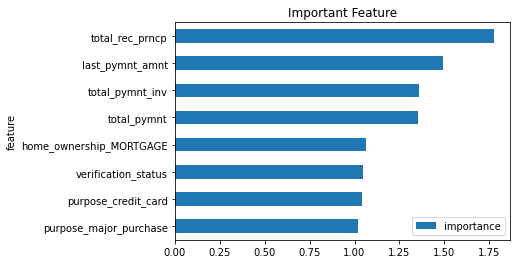

In [ ]:
import math

feature_names = x_train.columns.to_list()

#Get the scores
score = logres.score(x_train.values, y_train)
print(score)
w0 = logres.intercept_[0]
w = logres.coef_[0]

feature_importance = pd.DataFrame(feature_names, columns = ['feature'])
feature_importance['importance'] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by=['importance'],ascending=False)
feature_importance = feature_importance[:8].sort_values(by=['importance'], ascending=False)

#Visualization
ax = feature_importance.sort_values(by=['importance'], ascending=True).plot.barh(x='feature', y='importance')

plt.title('Important Feature')
plt.show()

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)

eval_classification(dt)

Accuracy (Test Set): 0.99
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
AUC:0.9879926162224494


In [ ]:
print('Train score: ' + str(dt.score(x_train, y_train)))
print('Test score:' + str(dt.score(x_test, y_test)))

Train score: 1.0
Test score:0.9925331099524834


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=0)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=0, scoring='precision')
dt_tuned.fit(x_train, y_train)

# Predict & Evaluation
eval_classification(dt_tuned)

Accuracy (Test Set): 0.98
Precision (Test Set): 0.99
Recall (Test Set): 0.99
F1-Score (Test Set): 0.99
AUC:0.9759673442396489


Text(0.5, 1.0, 'feature importance score')

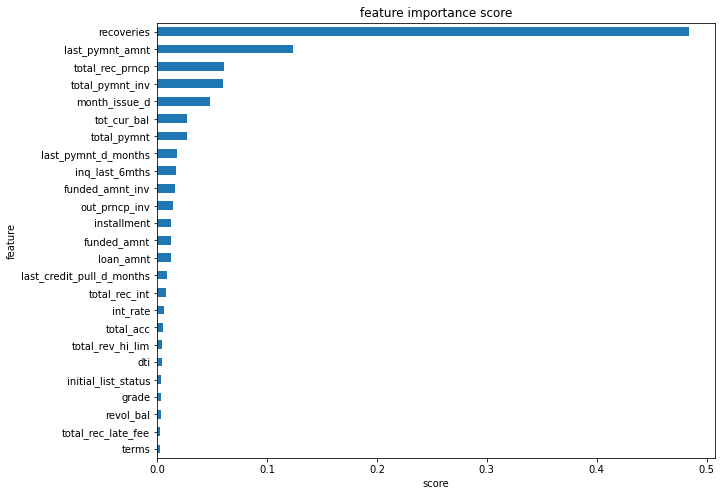

In [ ]:
# plt.figsize(10, 8)
feat_importances = pd.Series(dt_tuned.best_estimator_.feature_importances_, index=x_train.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

### XGBoost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=0)
xg.fit(x_train, y_train)

eval_classification(xg)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
AUC:0.9954587383230694


In [ ]:
print('Train score: ' + str(xg.score(x_train, y_train)))
print('Test score:' + str(xg.score(x_test, y_test)))

Train score: 0.9999195325459902
Test score:0.9977613772584815


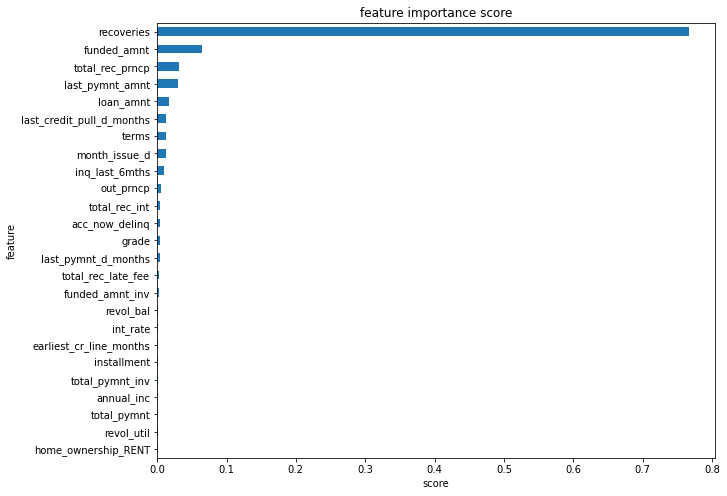

In [ ]:
show_feature_importance(xg)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(x_train, y_train)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 1.00
Precision (Test Set): 0.99
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
AUC:0.9885699492781563


Text(0.5, 1.0, 'feature importance score')

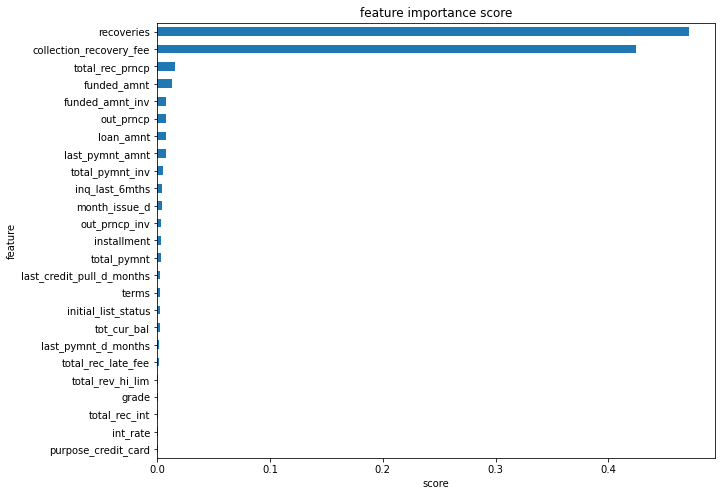

In [ ]:
# plt.figsize(10, 8)
feat_importances = pd.Series(xg_tuned.best_estimator_.feature_importances_, index=x_train.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [ ]:
from xgboost import XGBClassifier
xg1 = XGBClassifier(random_state=0)
xg1.fit(x_test, y_test)

eval_classification(xg1)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
AUC:1.0


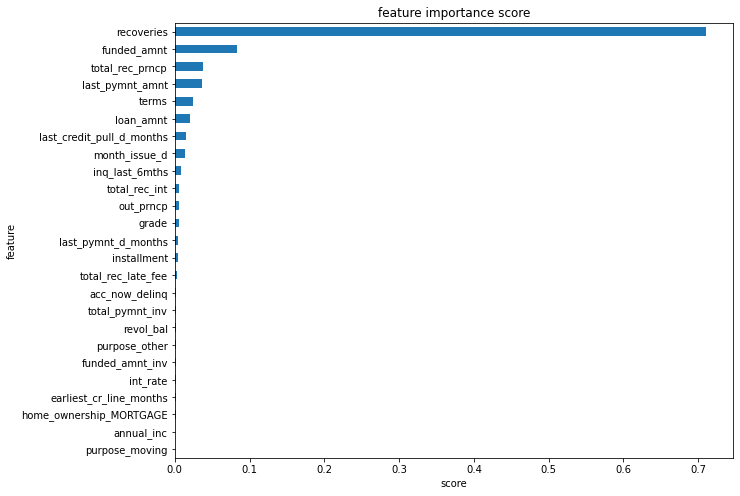

In [ ]:
show_feature_importance(xg1)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg.fit(x_test,y_test)
y_pred_proba = xg.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

In [ ]:
df_actual_predicted

,y_actual,y_pred_proba
115860,1.0,0.999923
2906,1.0,0.999901
396584,1.0,0.999995
30812,1.0,0.999636
112780,0.0,0.000003
...,...,...
77321,1.0,0.999996
332819,0.0,0.000002
345469,0.0,0.000009
165605,1.0,0.999394


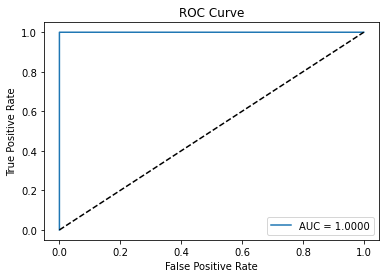

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('roc.jpg')

[[13845     0]
 [    0 55394]]


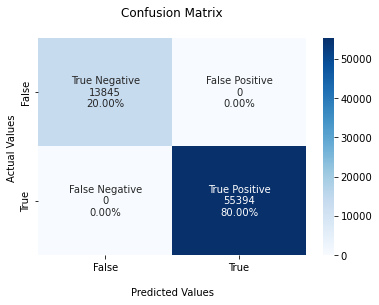

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
y_pred = xg.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()
plt.savefig('confusionmatrix.jpg')